In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("kmeans(Mall_Customers).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


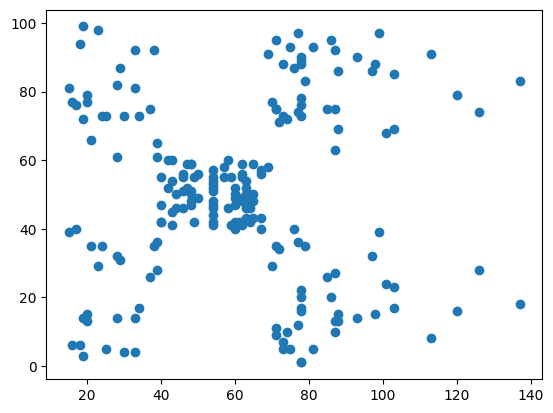

In [5]:
# x = df[Annual Income (k$)]
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [10]:
# Elbow Method
wcss = []
k_range = range(1,11)
for i in k_range:
    kmean = KMeans(n_clusters = i)
    kmean.fit(df)
    wcss.append(kmean.inertia_)

C:\Users\ishat\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ishat\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ishat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ishat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

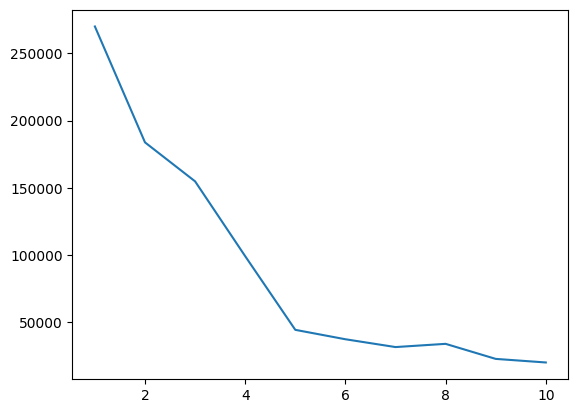

In [11]:
plt.plot(k_range,wcss)

In [12]:
kmean = KMeans(n_clusters = 5)
kmean.fit(df)

KMeans(n_clusters=5)

In [13]:
df["clusters"] = kmean.labels_

In [14]:
df

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


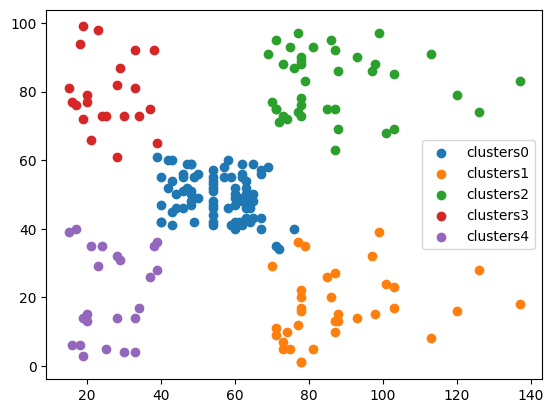

In [17]:
for i in range(5):
    plt.scatter(
        df.loc[df["clusters"]==i,"Annual Income (k$)"],
        df.loc[df["clusters"]==i,"Spending Score (1-100)"],
        labels = f"clusters{i}"
    )
plt.legend()